In [1]:
!pip -q install roboflow opencv-python matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 89.3 MB/s eta 0:00:00


In [2]:
import os
import json
import cv2
import pandas as pd
import matplotlib.pyplot as plt

from roboflow import Roboflow
from google.colab import files
from PIL import Image


In [3]:
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="aImUMFk7EkUzyTAImw59")
project = rf.workspace("stupid-stan-as-sonia-team-manager").project("panel-detection-evbvh")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PANEL-DETECTION--1 in yolov11:: 100%|██████████| 342/342 [00:00<00:00, 6012.46it/s]


In [5]:
ROBOFLOW_API_KEY = "aImUMFk7EkUzyTAImw59"
WORKSPACE_NAME = "stupid-stan-as-sonia-team-manager"
PROJECT_NAME = "panel-detection-evbvh"
VERSION_NUMBER = 1

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(WORKSPACE_NAME).project(PROJECT_NAME)
model = project.version(VERSION_NUMBER).model

print("Connected to Roboflow model:")
print("Workspace:", WORKSPACE_NAME)
print("Project:", PROJECT_NAME)
print("Version:", VERSION_NUMBER)


loading Roboflow workspace...
loading Roboflow project...
Connected to Roboflow model:
Workspace: stupid-stan-as-sonia-team-manager
Project: panel-detection-evbvh
Version: 1


In [6]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

print("Image uploaded:", img_path)


Saving 55.png to 55.png
Image uploaded: 55.png


In [7]:
original_image = Image.open(img_path)
input_for_predict_path = img_path
temp_file_created = False

if original_image.mode == 'RGBA':
    converted_image = original_image.convert('RGB')
    temp_img_for_prediction_path = "temp_input_image_for_prediction.jpeg"
    converted_image.save(temp_img_for_prediction_path, "JPEG")
    input_for_predict_path = temp_img_for_prediction_path
    temp_file_created = True


In [9]:
CONFIDENCE = 0.5
prediction = model.predict(
    input_for_predict_path,
    confidence=CONFIDENCE
)


In [10]:
output_img = "roboflow_prediction.jpg"
prediction.save(output_img)

print("Prediction saved as:", output_img)

if temp_file_created and os.path.exists(temp_img_for_prediction_path):
    os.remove(temp_img_for_prediction_path)


Prediction saved as: roboflow_prediction.jpg


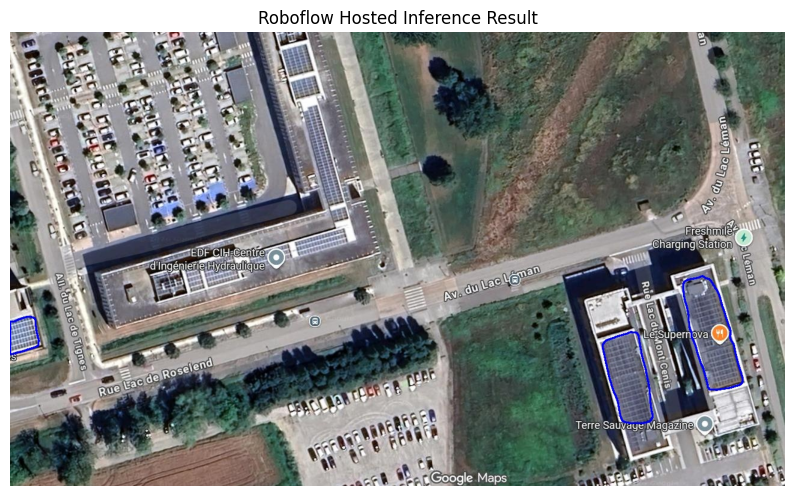

In [11]:
img_bgr = cv2.imread(output_img)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Roboflow Hosted Inference Result")
plt.show()


In [12]:
pred_json = prediction.json()
predictions = pred_json.get("predictions", [])

df = pd.DataFrame(predictions)

print("Number of detections:", len(df))
df.head()


Number of detections: 3


,x,y,width,height,confidence,class,class_id,detection_id,points,image_path,prediction_type
0,1029.637177,577.260178,94.369934,152.166290,0.774384,pv,0,79962976-27df-450b-bdab-98546cd0c506,"[{'x': 1034.0, 'y': 500.0}, {'x': 1033.0, 'y':...",temp_input_image_for_prediction.jpeg,InstanceSegmentationModel
1,1169.093689,504.694794,106.773804,187.581726,0.642256,pv,0,ebd8db4c-9ddb-428d-920d-009ec1232a29,"[{'x': 1153.0, 'y': 407.0}, {'x': 1152.0, 'y':...",temp_input_image_for_prediction.jpeg,InstanceSegmentationModel
2,25.479140,506.529282,50.818545,63.350494,0.597006,pv,0,d3f1e995-627a-4dd1-9d2f-749f7ae1997c,"[{'x': 27.0, 'y': 475.0}, {'x': 26.0, 'y': 476...",temp_input_image_for_prediction.jpeg,InstanceSegmentationModel


In [13]:
df.to_csv("roboflow_predictions.csv", index=False)
print("Saved predictions to roboflow_predictions.csv")


Saved predictions to roboflow_predictions.csv


In [ ]:
uploaded_images = files.upload()
